# Using `pandas` to investigate pay gap data

In [ ]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

## Read the data from the `csv` file

1. What does `csv` stand for?

In [ ]:
data = pandas.read_csv("PayGapData1920.csv", index_col='CompanyNumber')

## Look at the first few rows

In [ ]:
data

,EmployerName,Address,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
CompanyNumber,,,,,,,,,,,,,,,,,,,,,,,,
RC000641,'PRIFYSGOL ABERYSTWYTH' AND 'ABERYSTWYTH UNIVE...,"Aberystwyth University, Penglais, Ceredigion, ...",NaN,11.5,10.3,NaN,NaN,0.0,0.0,53.0,47.0,41.0,59.0,40.0,60.0,62.0,38.0,https://www.aber.ac.uk/en/equality/genderpayga...,Elizabeth Treasure (Vice-Chancellor),1000 to 4999,'PRIFYSGOL ABERYSTWYTH' AND 'ABERYSTWYTH UNIVE...,False,05/04/2020 00:00:00,03/04/2020 14:47:45
08064685,10 TRINITY SQUARE HOTEL LIMITED,"5 Market Yard Mews, 194-204 Bermondsey Street,...",82990,8.7,10.3,29.6,54.5,90.5,90.5,47.9,52.1,56.3,43.7,78.9,21.1,66.7,33.3,NaN,Linda Stigter (Director of People and Culture),250 to 499,10 TRINITY SQUARE HOTEL LIMITED,False,05/04/2020 00:00:00,19/03/2020 15:51:20
02566586,1LIFE MANAGEMENT SOLUTIONS LIMITED,"Ldh House St Ives Business Park, Parsons Green...","93110,\n93130,\n93290",11.0,-0.5,81.5,94.2,10.0,11.4,49.0,51.0,35.3,64.7,42.3,57.7,44.2,55.8,https://www.1life.co.uk/gender-pay-gap,Mark Braithwaite (Managing Director),250 to 499,1LIFE MANAGEMENT SOLUTIONS LIMITED,False,05/04/2020 00:00:00,10/03/2020 17:03:17
07972006,1ST CHOICE STAFF RECRUITMENT LIMITED,"1ST CHOICE RECRUITMENT, 8 St. Loyes Street, Be...",78109,-2.3,0.0,-114.8,-249.3,1.1,0.4,50.8,49.2,67.7,32.3,62.9,37.1,50.0,50.0,https://www.1stchoice.net/gender-pay-gap-repor...,Gill Knight (MD),250 to 499,1ST CHOICE STAFF RECRUITMENT LIMITED,False,05/04/2020 00:00:00,24/01/2020 09:37:01
SC272838,1ST HOME CARE LTD.,"14b Dickson Street, Elgin Industrial Estate, D...","86900,\n88100",-2.0,0.5,NaN,NaN,0.0,0.0,10.0,90.0,8.0,92.0,9.0,91.0,9.0,91.0,https://reallifeoptions.org/,Ian Hardcastle (Chief Operating Officer),250 to 499,1ST HOME CARE LTD.,False,05/04/2020 00:00:00,12/03/2020 08:21:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01137722,ZF SERVICES UK LIMITED,"Abbeyfield Road, Lenton, Nottingham, NG7 2SX",45310,7.6,11.3,23.6,11.3,49.8,45.1,75.9,24.1,74.7,25.3,81.6,18.4,87.5,12.5,https://www.zf.com/mobile/en/company/company_p...,Christopher Adcock (Managing Director),250 to 499,ZF SERVICES UK LIMITED,False,05/04/2020 00:00:00,04/02/2020 08:47:44
05197592,ZOPA LIMITED,"1st Floor Cottons Centre, 47-49 Tooley Street,...",64929,25.5,38.8,40.5,50.0,89.8,76.1,45.2,54.8,65.6,34.4,73.8,26.2,82.0,18.0,https://blog.zopa.com/2019/09/30/gender-divers...,Jaidev Janardana (CEO),250 to 499,ZOPA LIMITED,False,05/04/2020 00:00:00,27/02/2020 13:32:25
02714645,ZOTEFOAMS PLC,"675 Mitcham Road, Croydon, CR9 3AL","22290,\n70100",3.8,-2.7,20.7,8.6,87.6,83.0,85.5,14.5,88.0,12.0,85.3,14.7,84.2,15.8,NaN,Jill Breingan (HR Director),250 to 499,ZOTEFOAMS PLC,False,05/04/2020 00:00:00,04/05/2020 16:05:24


2. Change the code above to look at the first ten rows
3. What about the last ten rows? (What's the opposite of heads?)

## Check the column headings

In [ ]:
data.columns

Index(['EmployerName', 'Address', 'SicCodes', 'DiffMeanHourlyPercent',
       'DiffMedianHourlyPercent', 'DiffMeanBonusPercent',
       'DiffMedianBonusPercent', 'MaleBonusPercent', 'FemaleBonusPercent',
       'MaleLowerQuartile', 'FemaleLowerQuartile', 'MaleLowerMiddleQuartile',
       'FemaleLowerMiddleQuartile', 'MaleUpperMiddleQuartile',
       'FemaleUpperMiddleQuartile', 'MaleTopQuartile', 'FemaleTopQuartile',
       'CompanyLinkToGPGInfo', 'ResponsiblePerson', 'EmployerSize',
       'CurrentName', 'SubmittedAfterTheDeadline', 'DueDate', 'DateSubmitted'],
      dtype='object')

Suppose we want to look at just one column? How could we do that?

In [ ]:
data.SicCodes

CompanyNumber
RC000641                      NaN
08064685                    82990
02566586    93110,\n93130,\n93290
07972006                    78109
SC272838            86900,\n88100
                    ...          
01137722                    45310
05197592                    64929
02714645            22290,\n70100
00243883            78300,\n82990
03843124                    82990
Name: SicCodes, Length: 5910, dtype: object

## Find the largest mean pay gap

In [ ]:
data.DiffMeanHourlyPercent.max()

100.0

4. What is the lowest mean pay gap?
5. What are the highest and lowest *median* pay gaps?

## Sort by pay gap

That max value seems fishy! Lets order by mean pay gap and take a look...

In [ ]:
data.sort_values(by='DiffMeanHourlyPercent', axis=0, ascending=False)

,EmployerName,Address,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
CompanyNumber,,,,,,,,,,,,,,,,,,,,,,,,
03622392,T. CLASS SECURITY LIMITED,"1 Kings Avenue, London, England, N21 3NA",80100,100.0,100.0,100.0,100.0,100.0,100.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,https://t-class.co.uk/,Demi Larner (Vetting Officer),250 to 499,T. CLASS SECURITY LIMITED,False,05/04/2020 00:00:00,08/05/2019 11:13:03
00040946,MANCHESTER CITY FOOTBALL CLUB LIMITED,"Etihad Stadium, Etihad Campus, Manchester, M11...",93120,86.9,5.0,98.3,44.6,31.0,33.6,75.0,25.0,70.1,29.9,66.4,33.6,82.5,17.5,https://www.mancity.com/meta/media/h4xnobbj/ma...,Ferran Soriano (CEO),500 to 999,MANCHESTER CITY FOOTBALL CLUB LIMITED,False,05/04/2020 00:00:00,06/04/2020 13:14:50
01965149,CHELSEA FOOTBALL CLUB LIMITED,"Stamford Bridge Ground, Fulham Road, London, S...",93120,86.8,9.8,94.3,2.3,65.0,66.0,76.3,23.7,86.2,13.8,83.3,16.7,88.7,11.3,NaN,Sara Matthews (Director of HR),1000 to 4999,CHELSEA FOOTBALL CLUB LIMITED,False,05/04/2020 00:00:00,03/04/2020 22:43:11
01989823,WOLVERHAMPTON WANDERERS FOOTBALL CLUB (1986) L...,"Molineux Stadium, Waterloo Road, Wolverhampton...",93120,80.4,10.7,97.9,56.2,31.0,25.0,75.3,24.7,67.4,32.6,79.9,20.1,85.4,14.6,https://www.wolves.co.uk/media/12485/gender-pa...,Jeff Shi (Executive Chairman),500 to 999,WOLVERHAMPTON WANDERERS FOOTBALL CLUB (1986) L...,False,05/04/2020 00:00:00,08/04/2020 16:23:38
02509978,SHEFFIELD WEDNESDAY FOOTBALL CLUB LIMITED,"Hillsborough, Sheffield, S6 1SW",93110,80.0,24.0,92.0,83.0,9.8,0.4,46.0,54.0,43.0,57.0,69.0,31.0,86.0,14.0,NaN,John Redgate (Finance Director),500 to 999,SHEFFIELD WEDNESDAY FOOTBALL CLUB LIMITED,False,05/04/2020 00:00:00,07/05/2020 18:46:53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
02610358,FLIGHTCARE LIMITED,"Adminstration Office, 22-32 Flemington Avenue,...","87100,\n87300",-70.0,0.0,-25.5,33.6,78.7,85.3,44.8,55.2,0.0,100.0,11.8,88.2,13.2,86.8,NaN,Walter Ward (Management Accoutant),250 to 499,FLIGHTCARE LIMITED,False,05/04/2020 00:00:00,23/08/2019 16:54:23
03834369,LOGOPLASTE UK LIMITED,"Suite 7 East Wing, 100 Longwater Avenue, Readi...","22220,\n70229,\n82990",-75.0,-35.0,-25.0,31.0,12.0,54.0,100.0,0.0,97.0,3.0,95.0,5.0,88.0,12.0,https://www.logoplaste.com/,Lisa Hillburn (VP HR Europe & SEA),250 to 499,LOGOPLASTE UK LIMITED,False,05/04/2020 00:00:00,16/04/2019 12:20:16
06624684,DAVID BROWN GEAR SYSTEMS LIMITED,"Park Works Park Road, Lockwood, Huddersfield, ...",28150,-118.5,-103.3,8.0,28.0,18.0,55.0,93.0,7.0,99.0,1.0,95.0,5.0,83.0,17.0,https://dbsantasalo.com/media/1508/dbs-gender-...,David Armitt (Chief Executive Officer),250 to 499,DAVID BROWN GEAR SYSTEMS LIMITED,False,05/04/2020 00:00:00,24/03/2020 08:51:57


6. Edit the code above to sort by *median* pay gap
7. Edit the code to put the results in *ascending* order

Let's remove that obviously dodgy data point! We should do this for any other obviously incorrect data, but make sure we record what we remove and why.

In [ ]:
data = data.drop('03622392')

KeyError: ignored

## Selecting/Filtering the data

The `loc` function (short for location) lets us select particular parts from the data. A single value passed to it can let us see the data in a single row with that index value.

In [ ]:
data.loc['09463829']

EmployerName                                   BBC STUDIOS PRODUCTIONS LIMITED
Address                      1 Television Centre, 101 Wood Lane, London, Un...
SicCodes                                                                 60200
DiffMeanHourlyPercent                                                     15.4
DiffMedianHourlyPercent                                                   13.4
DiffMeanBonusPercent                                                      86.4
DiffMedianBonusPercent                                                   -14.3
MaleBonusPercent                                                           8.3
FemaleBonusPercent                                                        11.4
MaleLowerQuartile                                                           34
FemaleLowerQuartile                                                         66
MaleLowerMiddleQuartile                                                   28.3
FemaleLowerMiddleQuartile                           

We can also pass other things to the `loc` function. Let's see how many companies reported a mean pay gap of more than 50% by using a *boolean condition* with `loc`

In [ ]:
data.loc[data.DiffMeanHourlyPercent > 50]

,EmployerName,Address,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
CompanyNumber,,,,,,,,,,,,,,,,,,,,,,,,
SC005364,ABERDEEN FOOTBALL CLUB LIMITED,"Pittodrie Stadium, Pittodrie Street, Aberdeen,...","93110,\n93120",59.6,18.2,67.7,45.3,16.8,2.9,68.2,31.8,63.6,36.4,74.2,25.8,90.9,9.1,https://d2cx26qpfwuhvu.cloudfront.net/aberdeen...,Roy Johnston (Company Secretary),250 to 499,ABERDEEN FOOTBALL CLUB LIMITED,False,05/04/2020 00:00:00,03/04/2020 15:06:17
02295324,ANGLO AMERICAN SERVICES (UK) LTD.,"20 Carlton House Terrace, London, SW1Y 5AN",82990,50.1,37.7,81.2,69.0,91.0,85.0,19.3,80.7,42.9,57.1,59.7,40.3,66.1,33.9,https://www.angloamerican.com/sustainability/p...,Richard Price (Group General Counsel & Company...,Less than 250,ANGLO AMERICAN SERVICES (UK) LTD.,False,05/04/2020 00:00:00,10/03/2020 10:23:47
08887139,ARTHUR J. GALLAGHER SERVICES (UK) LIMITED,"The Walbrook Building, 25 Walbrook, London, EC...",78300,50.1,41.1,76.9,63.3,69.0,64.0,35.4,64.6,42.7,57.3,59.6,40.4,80.6,19.4,https://www.ajg.com/uk/about-us/gender-pay-gap...,Claire Davies (HR Director),1000 to 4999,ARTHUR J. GALLAGHER SERVICES (UK) LIMITED,False,05/04/2020 00:00:00,15/10/2020 09:12:03
08911998,BEAUTY OUTLET LIMITED,"Tower Court, 170a Burgh Road, Skegness, Englan...",47750,51.0,7.0,NaN,NaN,0.0,0.0,0.0,100.0,8.0,92.0,3.0,97.0,11.0,89.0,NaN,Dan Hallam (Accountant),250 to 499,BEAUTY OUTLET LIMITED,False,05/04/2020 00:00:00,12/03/2020 10:46:49
07191520,BOUX AVENUE LIMITED,"1 St Georges Road, Wimbledon, London, United K...",47710,59.0,20.1,-23.0,-11.0,54.0,87.0,1.0,99.0,4.0,96.0,3.0,97.0,9.0,91.0,https://www.bouxavenue.com/,Luara Keane (Group HR Director),500 to 999,BOUX AVENUE LIMITED,False,05/04/2020 00:00:00,07/05/2020 12:35:55
00398426,BROWN SHIPLEY & CO. LIMITED,"2 Moorgate, London, England, EC2R 6AG",64191,50.5,38.3,80.9,75.0,78.9,71.6,33.7,66.3,47.9,52.1,72.9,27.1,82.3,17.7,https://brownshipley.com/jobs/,Alan Mathewson (CEO),250 to 499,BROWN SHIPLEY & CO. LIMITED,False,05/04/2020 00:00:00,02/04/2020 16:53:49
01616977,BYTES SOFTWARE SERVICES LIMITED,"Bytes House, Randalls Way, Leatherhead, Surrey...",62090,53.6,52.4,44.2,45.7,100.0,100.0,34.0,66.0,37.0,63.0,62.0,38.0,74.0,26.0,https://www.bytes.co.uk/company/corporate-poli...,Katy O'Donoghue (Payroll Manager),250 to 499,BYTES SOFTWARE SERVICES LIMITED,False,05/04/2020 00:00:00,16/03/2020 12:08:43
03462881,CARE UK CLINICAL SERVICES LIMITED,"Hawker House 5-6 Napier Court, Napier Road, Re...","86900,\n96090",51.5,28.4,46.4,50.6,8.8,2.8,11.8,88.2,16.2,83.8,20.4,79.6,50.1,49.9,http://www.careukhealthcare.com/our-results/ou...,Jim Easton (Chief Executive),1000 to 4999,PRACTICE PLUS GROUP HOSPITALS LIMITED,False,05/04/2020 00:00:00,02/04/2020 10:14:40
01965149,CHELSEA FOOTBALL CLUB LIMITED,"Stamford Bridge Ground, Fulham Road, London, S...",93120,86.8,9.8,94.3,2.3,65.0,66.0,76.3,23.7,86.2,13.8,83.3,16.7,88.7,11.3,NaN,Sara Matthews (Director of HR),1000 to 4999,CHELSEA FOOTBALL CLUB LIMITED,False,05/04/2020 00:00:00,03/04/2020 22:43:11


In [ ]:
len(data.loc[data.DiffMedianHourlyPercent < 0])

722

8. How many companies reported a mean pay gap in favour of women?
9. How many companies reported a *median* pay gap in favour of women?

## Searching by `SIC` code

Let's look at some companies in the tech sector

[SIC code reference](http://www.siccodesupport.co.uk/) says that SIC codes that start with 62 are for companies that do "Computer programming, consultancy, and related activities"

In [ ]:
data.loc[data.SicCodes.str.startswith("62", na=False)]

,EmployerName,Address,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
CompanyNumber,,,,,,,,,,,,,,,,,,,,,,,,
05083841,8X8 UK LIMITED,"Oxford House, Bell Business Park, Smeaton Clos...",62020,26.0,35.0,46.0,63.0,76.0,24.0,87.0,13.0,86.0,14.0,61.0,39.0,64.0,36.0,https://assets.contentstack.io/v3/assets/blt4f...,Anthony Shore (Senior Manager; Human Resources),250 to 499,8X8 UK LIMITED,False,05/04/2020 00:00:00,03/04/2020 16:08:58
02310474,ACI WORLDWIDE (EMEA) LIMITED,"Red House, 1st Floor Cemetery Pales, Brookwood...","62020,\n70100",8.1,17.8,16.1,5.0,86.9,70.5,57.8,42.2,65.6,34.4,81.3,18.7,71.9,28.1,https://www.aciworldwide.com/-/media/files/col...,David King (VP Customer Success),250 to 499,ACI WORLDWIDE (EMEA) LIMITED,False,05/04/2020 00:00:00,03/04/2020 08:34:24
02124540,ADVANCED 365 LIMITED,"Ditton Park, Riding Court Road, Datchet, Berks...",62090,13.0,20.0,49.0,28.0,97.0,96.0,81.0,19.0,85.0,15.0,90.0,10.0,89.0,11.0,https://www.oneadvanced.com/careers/women-in-t...,Alex Arundale (Chief People Officer),250 to 499,ADVANCED 365 LIMITED,False,05/04/2020 00:00:00,04/04/2020 21:23:50
03214465,ADVANCED BUSINESS SOFTWARE AND SOLUTIONS LIMITED,"Ditton Park, Riding Court Road, Datchet, Berks...",62020,16.0,9.0,48.0,0.4,81.0,85.0,79.0,21.0,67.0,33.0,75.0,25.0,83.0,17.0,https://www.oneadvanced.com/careers/women-in-t...,Alex Arundale (Chief People Officer),500 to 999,ADVANCED BUSINESS SOFTWARE AND SOLUTIONS LIMITED,False,05/04/2020 00:00:00,04/04/2020 21:29:06
02276684,AMADEUS IT SERVICES UK LIMITED,"3rd Floor First Point, Buckingham Gate London ...","62020,\n63990,\n79909",15.1,12.5,35.3,19.5,82.0,81.0,53.0,47.0,60.0,40.0,74.0,26.0,74.0,26.0,NaN,Timothy Brennan (General Manager),500 to 999,AMADEUS IT SERVICES UK LIMITED,False,05/04/2020 00:00:00,05/04/2020 22:18:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
05771461,WIN TECHNOLOGIES (UK) LIMITED,"55 Baker Street, London, England, W1U 7EU",62090,33.3,21.8,47.8,30.3,74.6,72.3,59.0,41.0,59.8,40.2,76.1,23.9,84.6,15.4,NaN,Phil Silver (HR Operations Manager),250 to 499,WIN TECHNOLOGIES (UK) LIMITED,False,05/04/2020 00:00:00,03/04/2020 17:17:51
08514184,WORLDLINE IT SERVICES UK LIMITED,"Second Floor, Mid City Place, 71 High Holborn,...","62020,\n62090,\n63990",15.6,19.7,44.8,23.1,66.0,58.0,62.0,38.0,73.0,27.0,77.0,23.0,80.0,20.0,https://uk.worldline.com/en/home/about-us/corp...,Christine Warner (Head of HR),"5000 to 19,999",WORLDLINE IT SERVICES UK LIMITED,False,05/04/2020 00:00:00,02/04/2020 16:36:47
00508212,XCHANGING GLOBAL INSURANCE SOLUTIONS LIMITED,"Royal Pavilion, Wellesley Road, Aldershot, Ham...",62020,27.0,23.0,62.0,55.0,70.0,70.0,62.0,38.0,69.0,31.0,88.0,12.0,91.0,9.0,NaN,Namrata Purohit (Total Rewards Advisor),250 to 499,XCHANGING GLOBAL INSURANCE SOLUTIONS LIMITED,False,05/04/2020 00:00:00,16/03/2020 16:12:13


10. How many companies have SIC codes that start with 62?
11. Put these companies in order of their mean pay gap

## Further analysis

Last half term you learned how to automatically produce various graphs. The matplotlib and seaborn libraries have already been imported if you want to try plotting a few different representations of the data that might be useful.

(-100.0, 100.0)

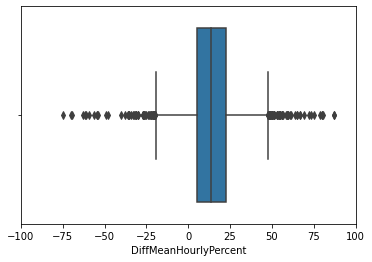

In [ ]:
sns.boxplot(x=data.DiffMeanHourlyPercent)
plt.xlim(-100,100) # what happens if we remove this line?

Beyond this, you may want to use data from the ASHE - the [summary data tables](https://www.ons.gov.uk/file?uri=%2femploymentandlabourmarket%2fpeopleinwork%2fearningsandworkinghours%2fdatasets%2fannualsurveyofhoursandearningsashegenderpaygaptables%2f2020provisional/genderpaygap2020provisional.zip) on gender pay gap here are especially useful: check out in particular Table 6.12 - Age group.

Getting these data into pandas might be a little tricky - clean them up first.